# IRIS Sample Data 불러오기 

In [2]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()


,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 계층적 군집화 분석

C:\Users\ewon\Anaconda3\envs\ml_practice\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


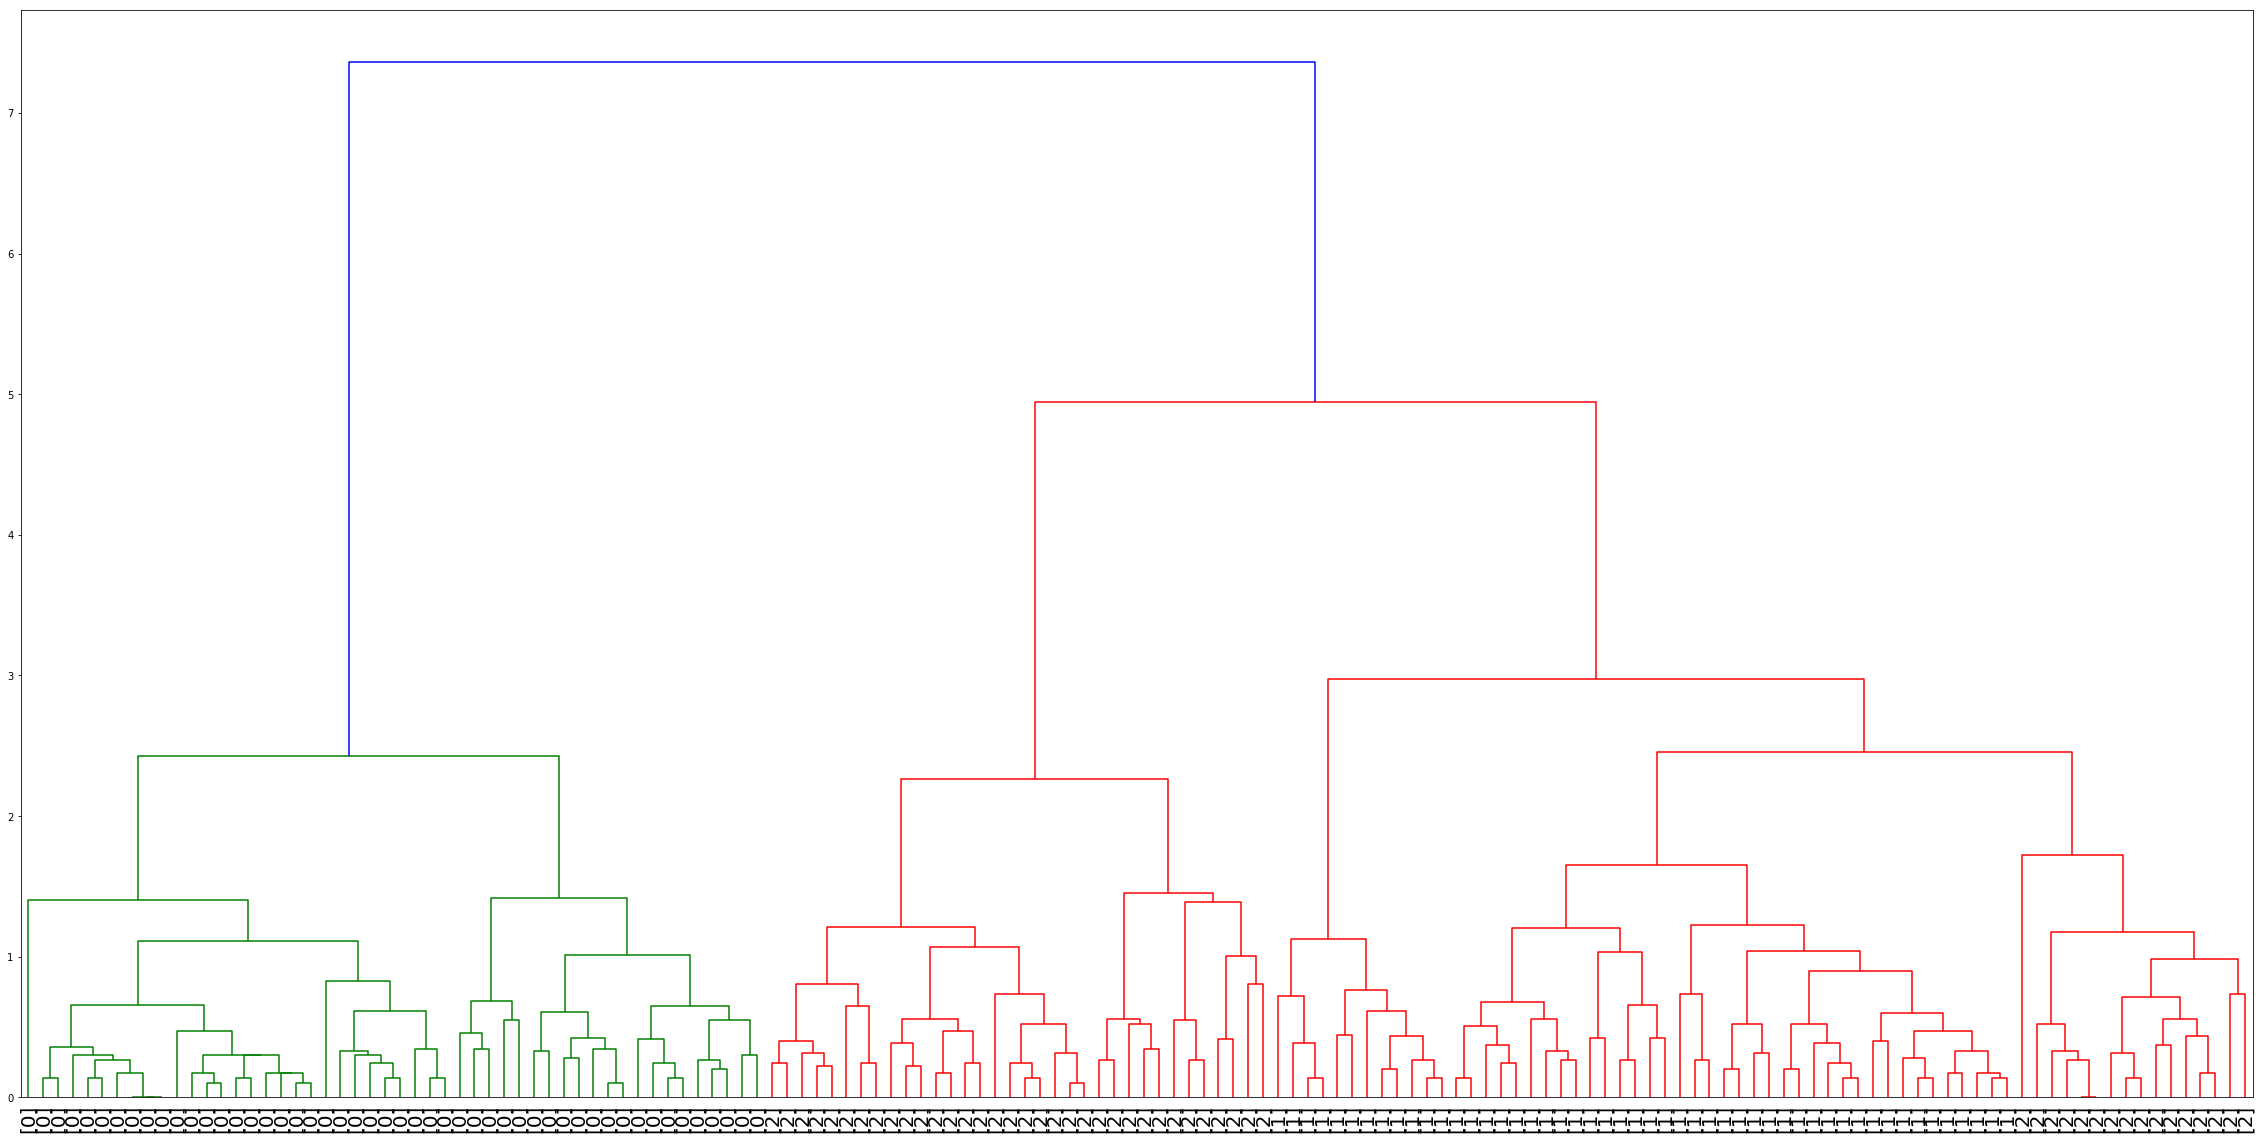

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


# 최장 연결법으로 군집-군집 or 군집-개체 간 거리 계산 
# linkage 함수 옵션 참고: https://kr.mathworks.com/help/stats/linkage.html
mergings = linkage(data,method='complete')

# Plot the dendrogram
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()


In [4]:
# 교차 분석 결과  
from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(mergings,3,criterion='distance'))
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],labels['labels'])
print(ct)


labels    0   1   2
predict            
1        50   0   0
2         0   0  34
3         0  50  16
